## **Efficiency**
Efficiency in incident resolution is crucial for any organization as it directly impacts customer satisfaction, team productivity, and operational costs. This project delves into the significance of optimizing incident management processes, identifying key strategies and tools to enhance efficiency, reduce response times, and ensure service continuity. Through data analysis and best practices, we aim to drive operational excellence and enhance the quality of service delivery.

In [49]:
import os
import numpy as np

In [50]:
import pandas as pd

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
cash = pd.read_csv('extract_cash_request.csv')
nombres_columnas = cash.columns
print(nombres_columnas)
cash.head()

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [53]:
cash[cash['user_id'].isna()]
#even when the student cancels the account, we can retrieve the user_id from "deleted_id".
#It provides valuable info as some students deleted the account after paying back.

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
19,545,100.0,rejected,2020-01-29 13:53:03.343598+00,2020-02-08 06:21:16.156719+00,NaN,2020-01-29 14:39:11.563872+00,304.0,2020-02-28 13:53:03.343216+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
21,613,100.0,rejected,2020-02-05 17:37:56.852948+00,2020-02-08 06:21:16.15229+00,NaN,2020-02-06 12:48:09.880702+00,304.0,2020-03-08 17:37:56.842421+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
25,84,100.0,rejected,2019-12-11 07:30:42.567035+00,2020-01-10 16:58:06.837117+00,NaN,2020-01-10 16:58:06.830329+00,91.0,2020-01-10 07:30:42.567035+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,23989,25.0,money_back,2020-10-24 10:22:05.934286+00,2020-12-18 13:14:25.891447+00,NaN,NaN,29610.0,2020-11-03 10:22:40.194197+00,NaN,2020-11-16 02:57:54.235926+00,instant,2020-10-24 10:22:40.194197+00,completed,2020-11-13 22:40:42.99552+00,2020-11-16 02:57:54.252045+00
23925,22913,100.0,money_back,2020-10-21 22:00:18.904317+00,2020-12-18 13:11:15.976246+00,NaN,NaN,30404.0,2020-11-09 23:51:00+00,2020-10-23,2020-11-10 19:51:45.285165+00,instant,2020-10-21 22:00:45.462413+00,NaN,NaN,NaN
23929,22641,100.0,money_back,2020-10-21 00:46:36.5907+00,2020-12-18 13:15:45.384787+00,NaN,NaN,29911.0,2020-12-06 23:00:00+00,2020-10-22,2020-12-10 23:00:00+00,instant,2020-10-21 00:47:58.826568+00,NaN,NaN,NaN
23940,23832,25.0,money_back,2020-10-23 22:56:09.02721+00,2020-12-18 13:11:28.776102+00,NaN,NaN,29803.0,2020-12-04 23:00:00+00,2020-10-24,2020-12-08 23:00:00+00,instant,2020-10-23 22:56:42.839064+00,NaN,NaN,NaN


As per our first analysis of the troubleshooting, we understand the importance of achieving a great rate in solving issues in the least time possible, as this will affect:

- Directly: the cashflow of the company
- Indirectly: the reputation of the company


In [60]:
#Creating a subset with the necessary columns only
cash_cohort = cash[['id','user_id','amount','created_at','deleted_account_id','recovery_status','reco_creation','reco_last_update']]


#Filling missing user_ids using deleted_account_id
cash_cohort.loc[:, 'user_id'] = cash_cohort['user_id'].fillna(cash_cohort['deleted_account_id'])


#Make sure no more missing user_ids
cash_cohort[cash_cohort['user_id'].isna()]


,id,user_id,amount,created_at,deleted_account_id,recovery_status,reco_creation,reco_last_update


In [55]:
cash_cohort['reco_last_update'] = pd.to_datetime(cash_cohort['reco_last_update'])
cash_cohort['reco_creation'] = pd.to_datetime(cash_cohort['reco_creation'])
cash_cohort['created_at'] = pd.to_datetime(cash_cohort['created_at'])


#we set a reimbursament range to check the time spend in resolving the incidents
cash_cohort['reimbursement_range'] = (cash_cohort['reco_last_update'] - cash_cohort['reco_creation']).dt.days


cash_cohort['reco_last_update'] = cash_cohort['reco_last_update'].dt.strftime('%Y-%m')
cash_cohort['reco_creation'] = cash_cohort['reco_creation'].dt.strftime('%Y-%m')
cash_cohort['created_at'] = cash_cohort['created_at'].dt.strftime('%Y-%m')



/tmp/ipykernel_3002/2767434579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_cohort['reco_last_update'] = pd.to_datetime(cash_cohort['reco_last_update'])
/tmp/ipykernel_3002/2767434579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_cohort['reco_creation'] = pd.to_datetime(cash_cohort['reco_creation'])
/tmp/ipykernel_3002/2767434579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

### **Understanding issues**
All the companies have issues, no one is perfect, but the point is how eficient are they solving this issues. 
We can try to glimpse this performance looking at the completed status data

The "completed" as status is defined as the payment incident was resolved (=the cash request was reimbursed). We need to keep this status in mind as it is consider the final status possible.

In [56]:
#trying to clean the nat from the original cohorts
cash_cohort = cash_cohort.dropna(subset=['reco_last_update', 'reco_creation'])


#we created a new df with only the "completed" recovery status information as we they have already completed the issue with the reimbursement
completed_df = cash_cohort.loc[cash_cohort['recovery_status'] == 'completed']
print(completed_df)


          id  user_id  amount created_at  deleted_account_id recovery_status  \
5       2145   9489.0   100.0    2020-05                 NaN       completed   
11      1794    778.0   100.0    2020-05                 NaN       completed   
72      2271  10503.0   100.0    2020-05                 NaN       completed   
84       898   4411.0   100.0    2020-03                 NaN       completed   
217     1199   6272.0   100.0    2020-04                 NaN       completed   
...      ...      ...     ...        ...                 ...             ...   
23911  15921  36311.0   100.0    2020-09                 NaN       completed   
23922  23989  29610.0    25.0    2020-10             29610.0       completed   
23963   7930  31413.0   100.0    2020-07                 NaN       completed   
23964  16834  20064.0   100.0    2020-09                 NaN       completed   
23966  25243  30367.0    50.0    2020-10             30367.0       completed   

      reco_creation reco_last_update  r

In [63]:
completed_risk = completed_df[['user_id','created_at','amount','reco_last_update','reco_creation','recovery_status','reimbursement_range']] 
completed_risk.head()
completed_risk.info()

#we select only the columns of our interest

<class 'pandas.core.frame.DataFrame'>
Index: 2468 entries, 5 to 23966
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2468 non-null   float64
 1   created_at           2468 non-null   object 
 2   amount               2468 non-null   float64
 3   reco_last_update     2468 non-null   object 
 4   reco_creation        2468 non-null   object 
 5   recovery_status      2468 non-null   object 
 6   reimbursement_range  2468 non-null   float64
dtypes: float64(3), object(4)
memory usage: 154.2+ KB


We check the number of user in each cohort based on the created date of the request

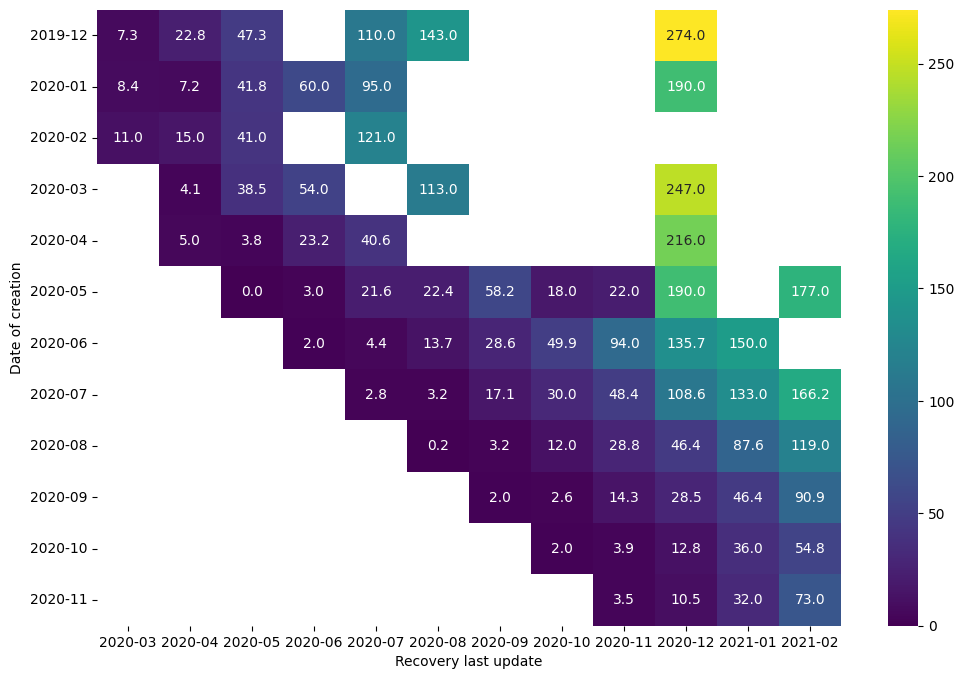

In [73]:
pivot_data = completed_risk.pivot_table(index='created_at', columns='reco_last_update', values='reimbursement_range', aggfunc='mean')

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt=".1f")

plt.xlabel('Recovery last update')
plt.ylabel('Date of creation')

plt.show()

#This heatmap shows us the total process from the creation of the request until closure date of the incident. 
#We only checked the completed status requests.

Efficient troubleshooting is the cornerstone of success for any company. It enhances customer satisfaction, boosts employee morale, and reduces operational costs. By swiftly addressing issues, we not only maintain a stellar reputation but also foster innovation and growth. Let's embrace efficiency to unlock our full potential.

As per the heatmap, we understand that the darker boxes means a smaller time between the creation of the request and the closure date(after an acknowledged incident). This information is used to understand the effciency of the company.


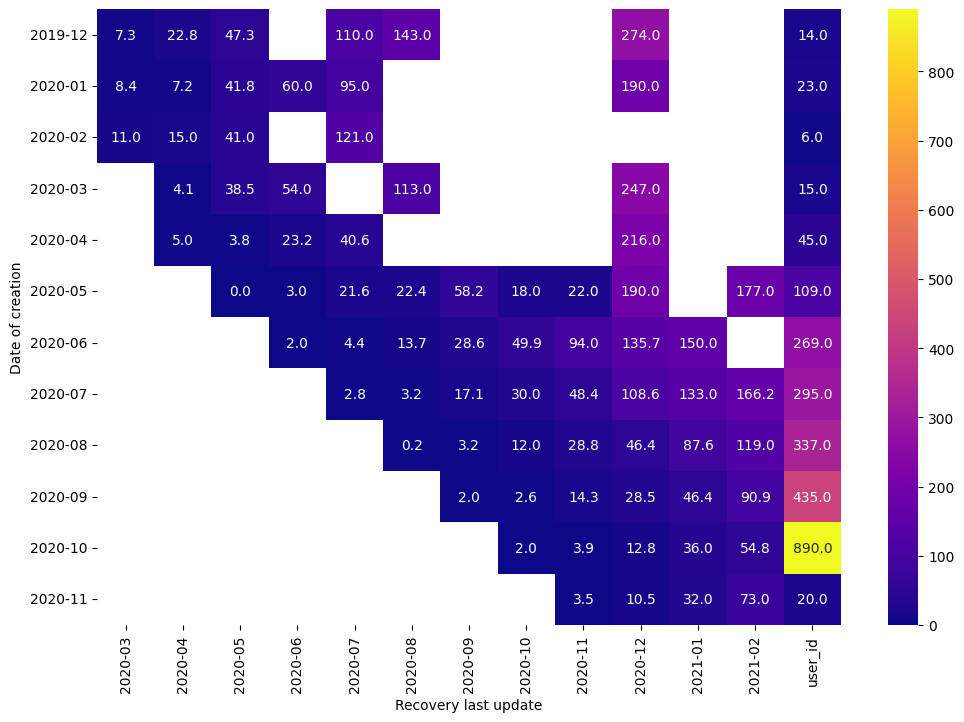

In [81]:
cohort_counts = completed_risk.groupby('created_at')['user_id'].nunique()
pivot_data_with_users = pivot_data.copy()  
pivot_data_with_users.insert(loc=0, column='num_users', value=cohort_counts)  


#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data_with_cohorts, cmap='plasma', annot=True, fmt=".1f")

plt.xlabel('Recovery last update')
plt.ylabel('Date of creation')

plt.show()